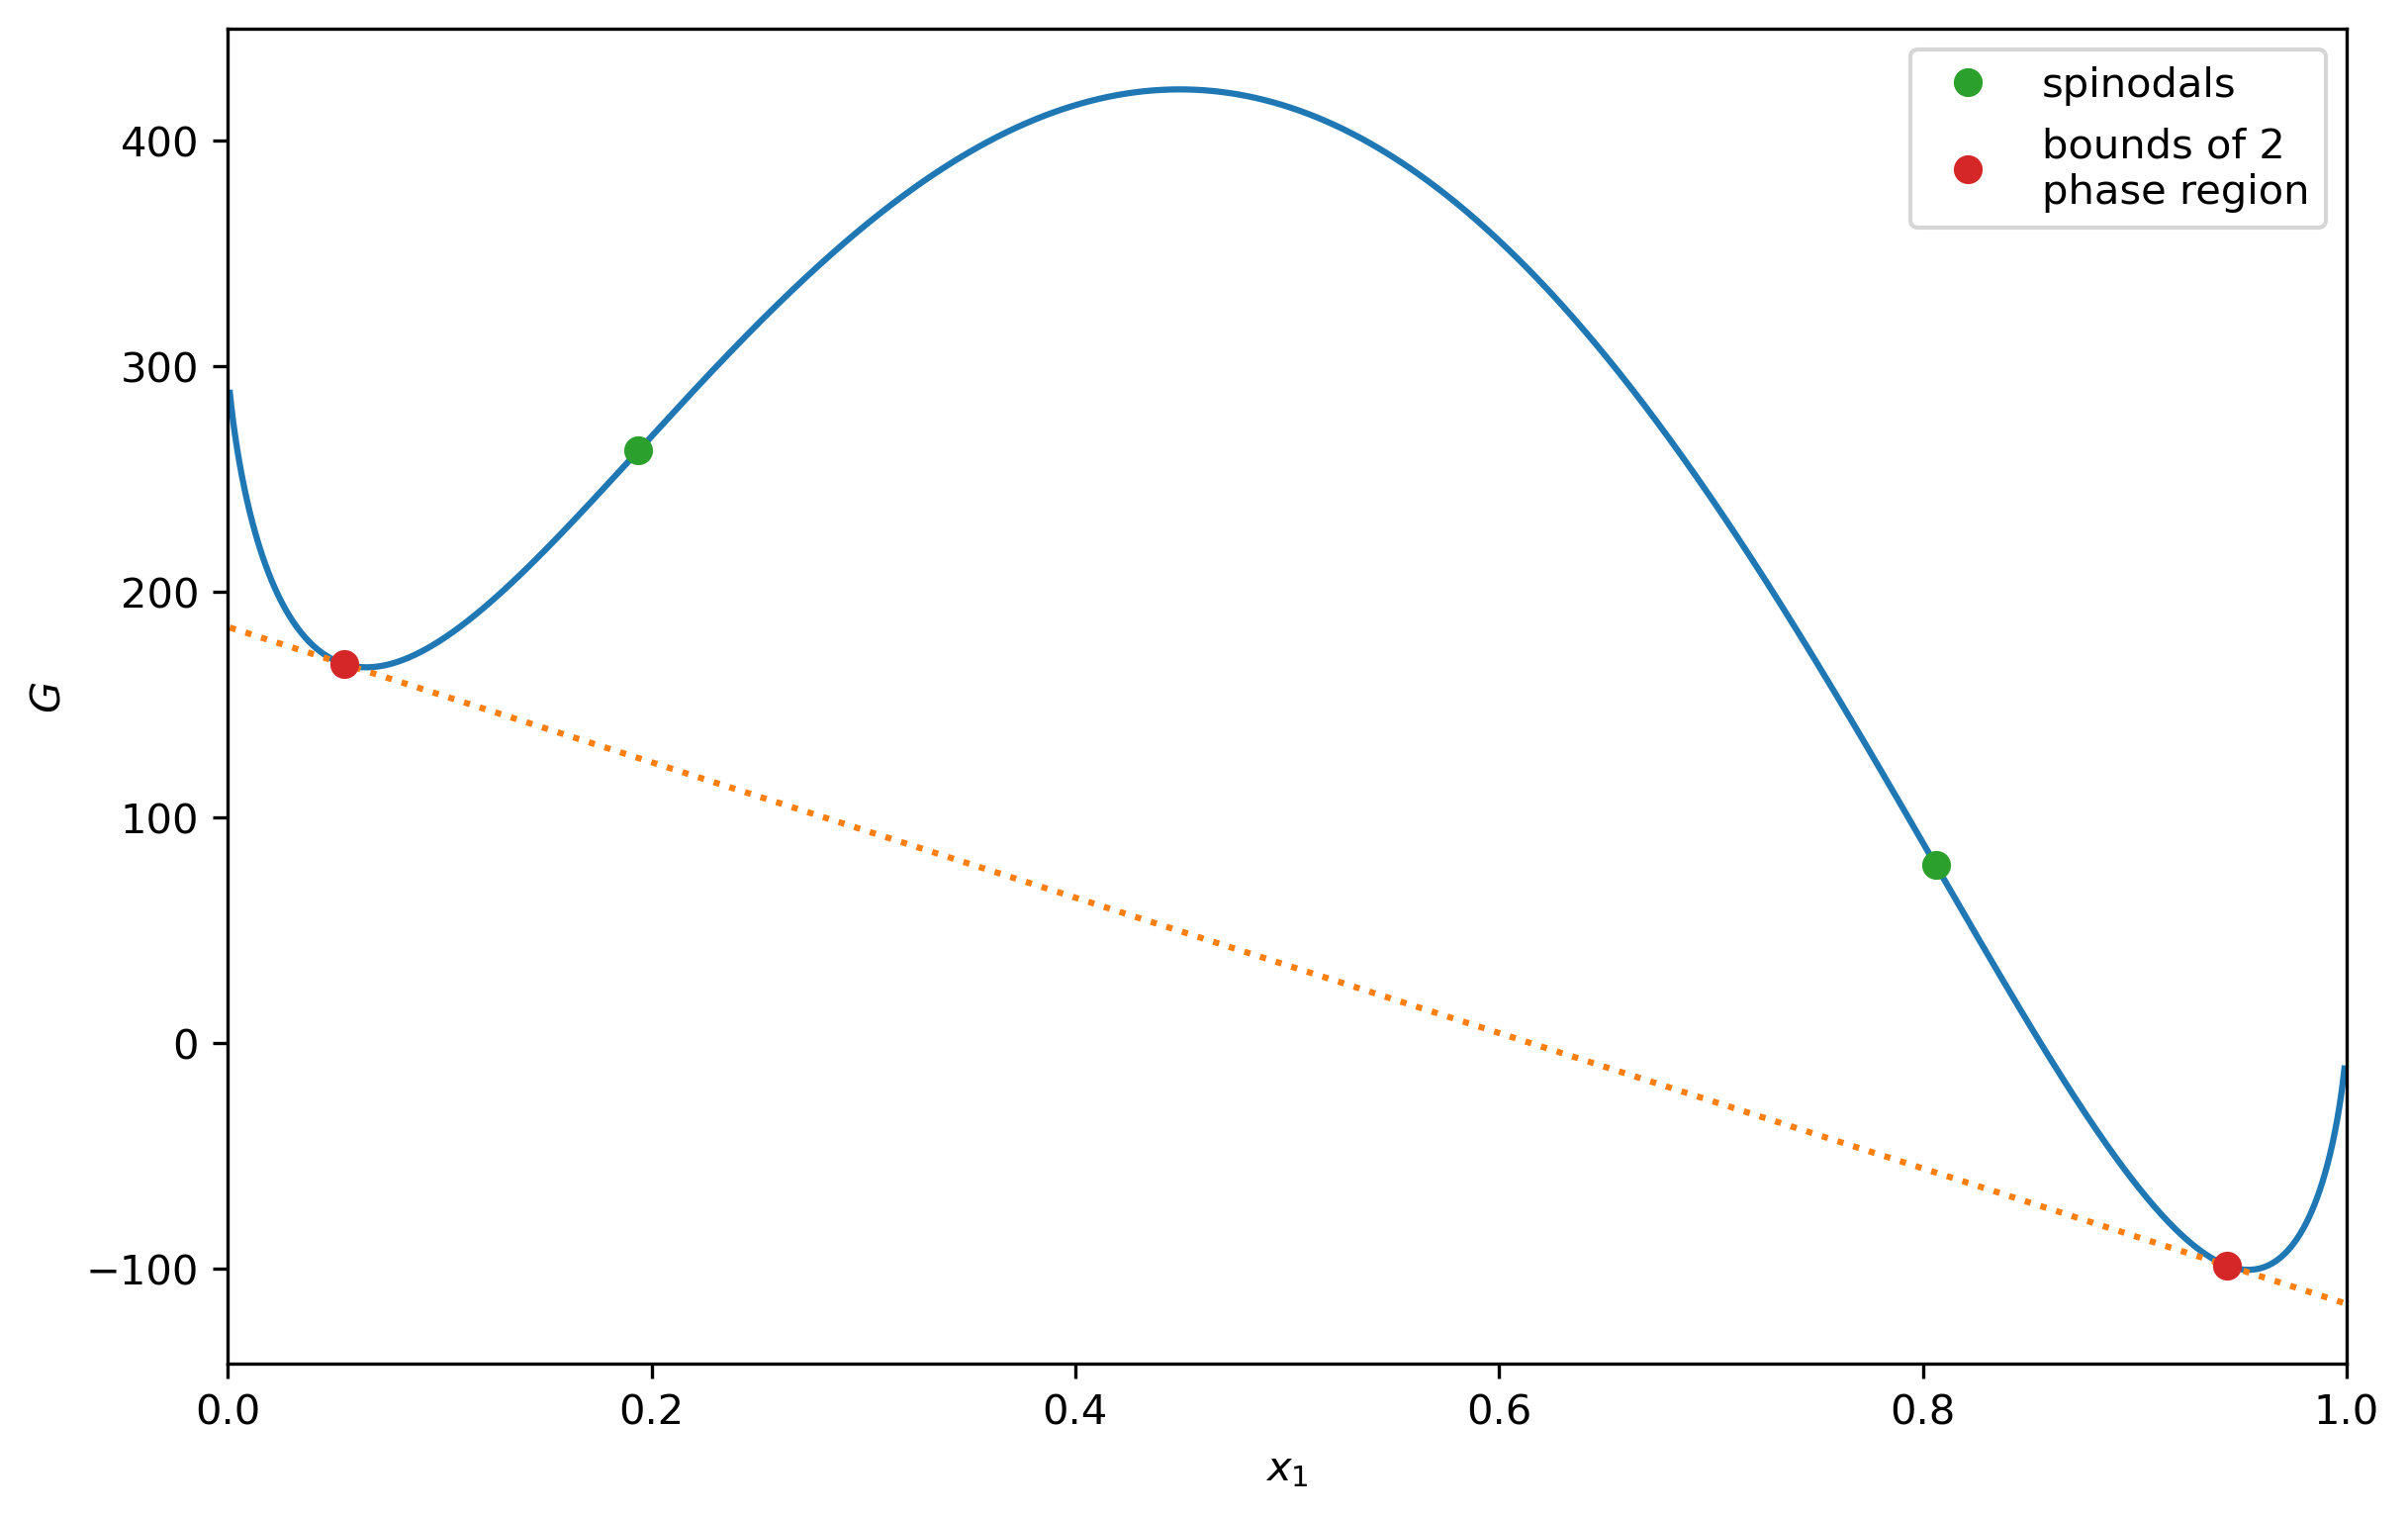

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import R

x1 = np.linspace(0.001,0.999,10000)
G =  (1-x1)*300 + R*298.15*(x1*np.log(x1) + (1-x1)*np.log(1-x1)) + 3.2*x1*(1-x1)*298.15*R
dips = np.where((G[1:-1] < G[0:-2]) * (G[1:-1] < G[2:]))[0] - 100

m,b = np.polyfit(x1[dips], G[dips], 1)

second_derivative = np.gradient(np.gradient(G))
spinodalsy, spinodalsx = G[np.isclose(second_derivative, 0, atol=0.00000002)], x1[np.isclose(second_derivative, 0, atol=0.00000002)]

fig,ax = plt.subplots(dpi=300, figsize=(8,5), layout='constrained')
plt.plot(x1, G)
plt.plot(x1, m*x1 + b, ":")
plt.plot(spinodalsx, spinodalsy, 'o', label='spinodals')
plt.plot (x1[dips], G[dips], 'o', label='bounds of 2\nphase region')
ax.legend()
ax.set(xlim=(0,1), ylabel="$G$", xlabel='$x_1$');
plt.savefig('lle_gibbs.pdf')